In [2]:
import math, random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def padbin(x, n):
    return format(x, '0%sb' %n)


padbin(7,5)

'00111'

In [4]:
def errf(ts, w):
    error = 0
    for x, y in ts:
        x = np.array(x)
        error += abs(A(w,x) - y)
    return error

In [5]:
def step(x):
    return 1 if x > 0 else 0

def A(w, x):
    return step(np.dot(w, x))

In [6]:
def perceptron_learn(ts, max_error):
    w = np.zeros(len(ts[0][0]))
    w[0] = 0.5
    error = 10000
    maxepochs = 100
    for epoch in range(maxepochs):
        for x, y in ts:
            x = np.array(x)
            ystar = A(w, x)
            y_error = y - ystar
            w = w + (y_error * 1 * x) # 1 is the learning rate
        error = errf(ts, w)
        if error <= max_error:
            break
    return w, error   

and_ts = [([-1, 0, 0], 0),
      ([-1, 0, 1], 0),
      ([-1, 1, 0], 0),
      ([-1, 1, 1], 1)]
perceptron_learn(and_ts, 0)

(array([ 2.5,  2. ,  1. ]), 0)

In [7]:
def make_ts(n, f):
    ts = []
    y = padbin(f, 2**n)
    for i in range(2**n):
        x = [int(j) for j in list(padbin(i, n))]
        x = [-1] + x
        ts.append((x, int(y[i])))
    return ts

make_ts(3, 65)

[([-1, 0, 0, 0], 0),
 ([-1, 0, 0, 1], 1),
 ([-1, 0, 1, 0], 0),
 ([-1, 0, 1, 1], 0),
 ([-1, 1, 0, 0], 0),
 ([-1, 1, 0, 1], 0),
 ([-1, 1, 1, 0], 0),
 ([-1, 1, 1, 1], 1)]

In [8]:
def learn_all_functions(b):
    learnable = 0
    for i in range(2**2**b):
        ts = make_ts(b, i)
        w, error = perceptron_learn(ts, 0)
        if error <= 0:
            learnable += 1
    return learnable

print(learn_all_functions(2))
print(learn_all_functions(3))
#print(learn_all_functions(4))

14
104


In [9]:
def majority_set(b):
    ts = []
    for i in range(2**b):
        x = [int(j) for j in list(padbin(i, b))]
        y = 1 if x.count(1) > x.count(0) else 0
        x = [-1] + x
        ts.append((x, y))
    return ts

majority_set(3)

[([-1, 0, 0, 0], 0),
 ([-1, 0, 0, 1], 0),
 ([-1, 0, 1, 0], 0),
 ([-1, 0, 1, 1], 1),
 ([-1, 1, 0, 0], 0),
 ([-1, 1, 0, 1], 1),
 ([-1, 1, 1, 0], 1),
 ([-1, 1, 1, 1], 1)]

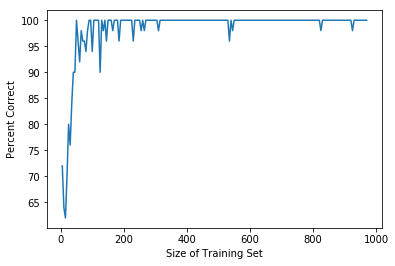

In [10]:
def check_weight(w, ts):
    n = 0
    for x,y in ts:
        x = np.array(x)
        ystar = A(w, x)
        if ystar == y:
            n+=1
    return n

def majority(b):
    xvalues = []
    yvalues = []
    total_set = majority_set(b)
    
    for i in range(5, 2**b - 50, 5):
        random.shuffle(total_set)
        test_set = total_set[:50]
        training_set = total_set[50:50+i]
        weight, error = perceptron_learn(training_set, 0)
        num_correct = check_weight(weight, test_set)
        
        xvalues.append(len(training_set))
        yvalues.append(num_correct / 50 * 100)
    
    plt.plot(xvalues, yvalues)
    plt.xlabel("Size of Training Set")
    plt.ylabel("Percent Correct")
    
majority(10)